# Statistical Pattern Recognition - Solution 3: K-means and EM

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import stats
from pathlib import Path
plt.rc('font', size=16)


## Utility functions

In [55]:
def plot_gaussian(ax, mean, cov, color, size=3):
    from matplotlib.patches import Ellipse
    from scipy.linalg import eigh

    vals, vecs = eigh(cov)
    order = vals.argsort()[::-1]
    vals = vals[order]
    vecs = vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))


    for i in range(1, size + 1):
        ellip = Ellipse(xy=mean, width=2*i*np.sqrt(vals[0]), height=2*i*np.sqrt(vals[1]), angle=theta,
                    edgecolor=color, fc='None', lw=2)
    ax.add_patch(ellip)


## $\star$ Part 1: K-means and EM with sklearn

Run the Sklearn implementations of k-means and expectation maximization on the dataset *gaussianplus.npz*.


Plot the estimated assignments and the estimated
parameters of the two Gaussians. 

Describe how the fitting by expectation maximization outperforms the one with k-means.

Try with varying, also
very bad initializations. How stable are the results?


Keys in the files  ['arr_0']
Array: arr_0
 Shape of the array (120, 2)
 Dtype of the array float64
 First 5 rows of the data : [[ 2.53766714  4.53428727]
 [ 3.83388501  4.98176918]
 [-0.25884686 -0.30158736]
 [ 2.86217332  3.82168409]
 [ 2.31876524  3.74100458]]


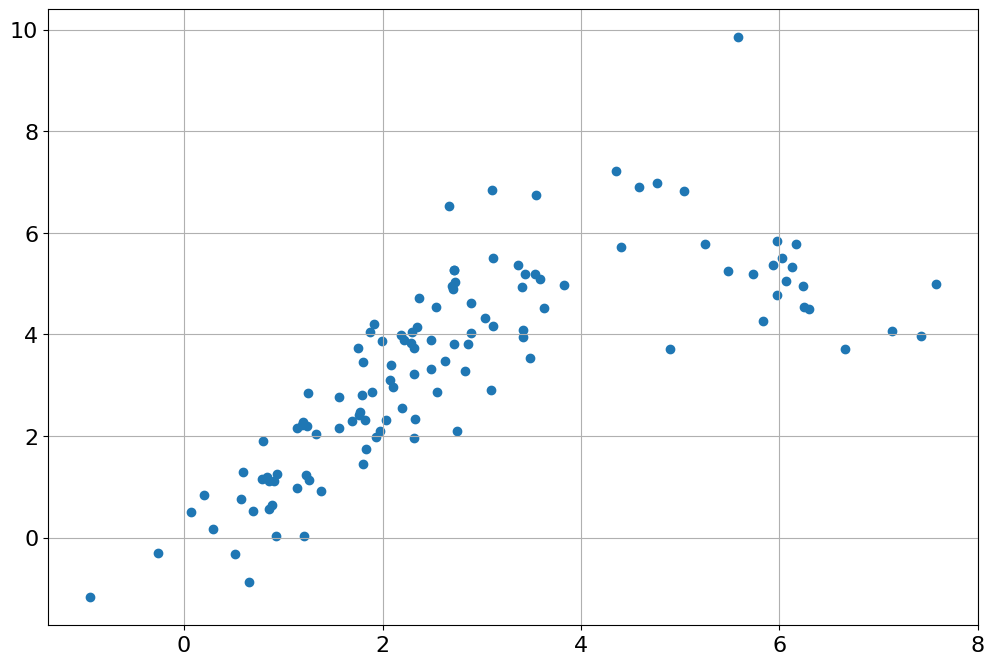

In [56]:
# Load and visualize the dataset (as in previous exercises):

# START TODO #################
data_dir  = Path("../data")
file_path = data_dir / "gaussianplus.npz"


#checking the data
try:
    with np.load(file_path) as data:
        print("Keys in the files ", data.files)
        for key in data.files:
            print(f'Array: {key}')
            data = data[key]
            print(f' Shape of the array {data.shape}')
            print(f' Dtype of the array {data.dtype}')
            if data.ndim > 1 and data.shape[0] > 5:
                print(f' First 5 rows of the data : {data[:5]}')
            else:
                print(f'Content : {data}')
except Exception as e:
    print(e)

#mean of the data
mean = np.mean(data, axis = 0)

#covariance of tge data
covar = np.cov(data, rowvar = False)

def visualize_data(data, mean, covar):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.scatter(data[:, 0] , data[: , 1])
    plt.grid()
    plt.show()

visualize_data(data, mean, covar)


# END TODO #################


### Part 1.1: Run K-Means


Centroids:
[[4.04352806 4.92971669]
 [1.38663598 1.75281102]]


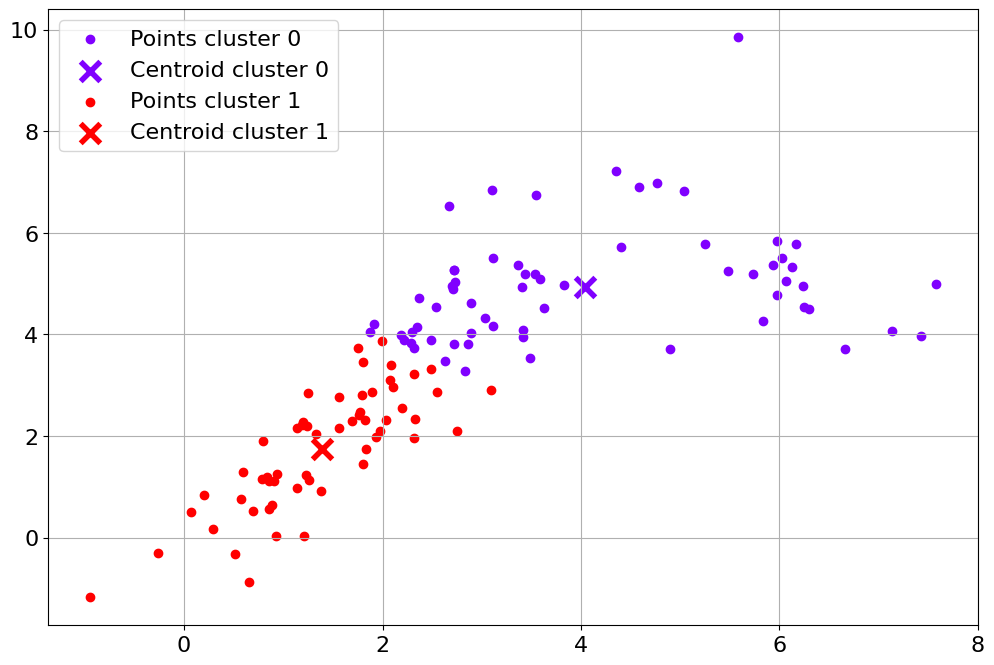

In [57]:
def run_and_plot_k_means(data, init='random', k=2): 
    """
    Runs the K-means algorithm from sklearn on the input data and plots the results. 
    
    Args:
        data: Input data.
        init: Initialization method (see the sklearn documentation).
        k : Number of clusters.
    """

    # Apply the K-Means clustering implementation from sklearn (see documentation for usage instructions).
    # Store the cluster assignments in a variable called 'labels' and the cluster centroids in a 
    # variable called 'centroids':
    # START TODO #################
    kmeans = KMeans(n_clusters=k, init=init, random_state=0, n_init=1)
    kmeans.fit(data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    # END TODO #################

    # Print centroids:
    # START TODO #################
    print("Centroids:\n{}".format(centroids))
    # END TODO #################
    
    # Plot results (plot datapoints and centroids; color points according to the cluster assignment):
    # START TODO #################
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.grid()
    
    cmap = plt.get_cmap('rainbow')
    colors = [cmap(i) for i in np.linspace(0, 1, k)]
    for i, color in enumerate(colors):
        cluster = data[labels==i]
        ax.scatter(cluster[:, 0], cluster[:, 1], color=color, label="Points cluster {}".format(i))
        ax.scatter(centroids[i, 0], centroids[i, 1], color=color, marker="x", s=200, lw=4, label="Centroid cluster {}".format(i))

    ax.legend()
    # END TODO #################


# run with random init:
run_and_plot_k_means(data, init='random')

Centroids:
[[1.38663598 1.75281102]
 [4.04352806 4.92971669]]


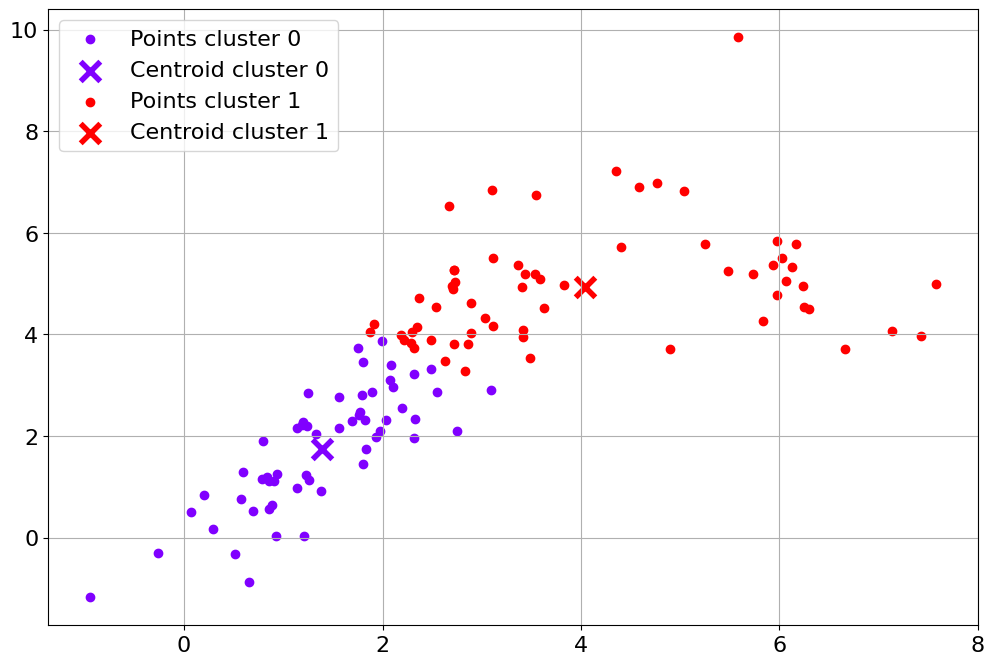

In [58]:
# run with manual init:
run_and_plot_k_means(data, init=np.array([[16,16], [14,14]]))


### Part 1.2: Run EM algorithm


Means of GMM : 
[[2.11855468 3.11168998]
 [6.08750679 4.96159276]]
Weights of GMM : 
[0.83296608 0.16703392]


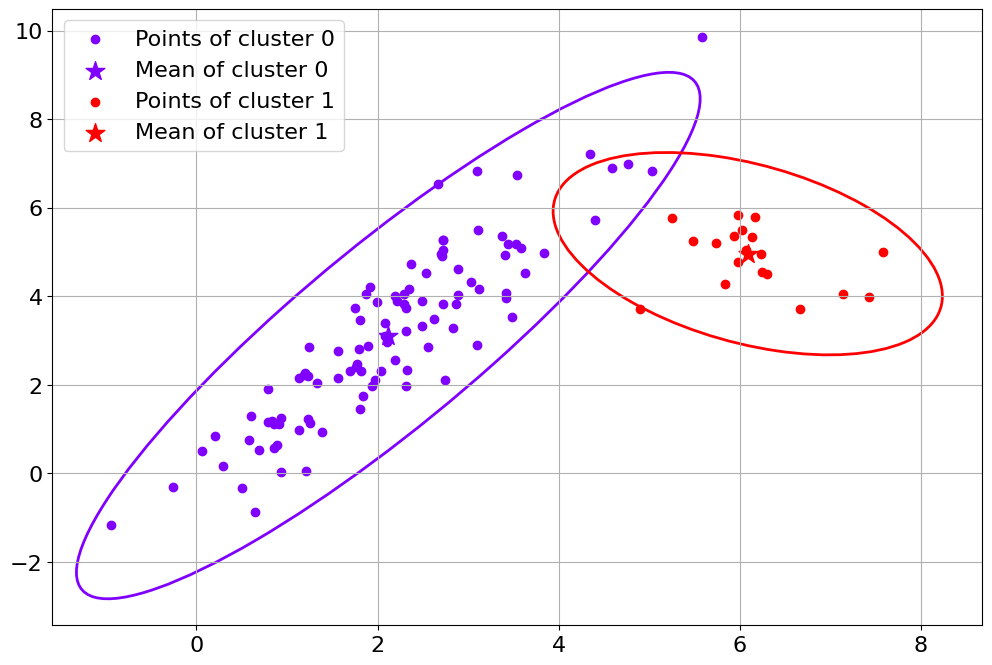

In [59]:
def run_and_plot_em(data, means_init=None, k=2):
    """
    Runs the EM algorithm from sklearn on the input data and plots the results.

    Args:
        data: Input data.
        means_init: Initial means of the gaussians.
        k: Number of mixture components.
    """
    # Apply the EM-algorithm implementation from sklearn (see documentation for usage instructions).
    # Store the cluster assignments in a variable called 'labels', the estimated means in a variable 'means',
    # the estimated weights in a variable 'weights' and the estimated covariances in a variable 'covariances':
    # START TODO #################
    gaussian_mixture = GaussianMixture(n_components = k, 
                                       n_init = 10,  random_state = 0, covariance_type = 'full', 
                                       means_init = means_init).fit(data)
    means = gaussian_mixture.means_
    weights = gaussian_mixture.weights_
    covariances  = gaussian_mixture.covariances_ 
    labels = gaussian_mixture.predict(data)

    # END TODO #################

    # Print means and mixture weights:
    # START TODO #################
    print(f'Means of GMM : \n{means}')
    print(f'Weights of GMM : \n{weights}')
    # END TODO #################

    # Plot results:
    # (plot datapoints and centroids; color points according to the cluster assignment;
    # plot covariances with the plot_gaussian function)
    # START TODO #################
    fig, ax = plt.subplots(figsize=(12,8))
    ax.grid()

    cmap = plt.get_cmap('rainbow')
    colors = [cmap(i) for i in np.linspace(0 , 1 , k)]
    for i, color in enumerate(colors):
        cluster = data[labels == i]
        ax.scatter(cluster[: , 0] , cluster[: ,1], color = color, label = f'Points of cluster {i}')
        ax.scatter(means[i , 0] , means[i ,1], color = color, label = f'Mean of cluster {i}', marker = "*", s=200)

        #plot ellipse
        plot_gaussian(ax, means[i], covariances[i], colors[i])
    ax.legend()

    
    # END TODO #################


# run with random init:
run_and_plot_em(data)


Means of GMM : 
[[3.85568171 7.82310097]
 [2.75611057 3.31661259]]
Weights of GMM : 
[0.02309424 0.97690576]


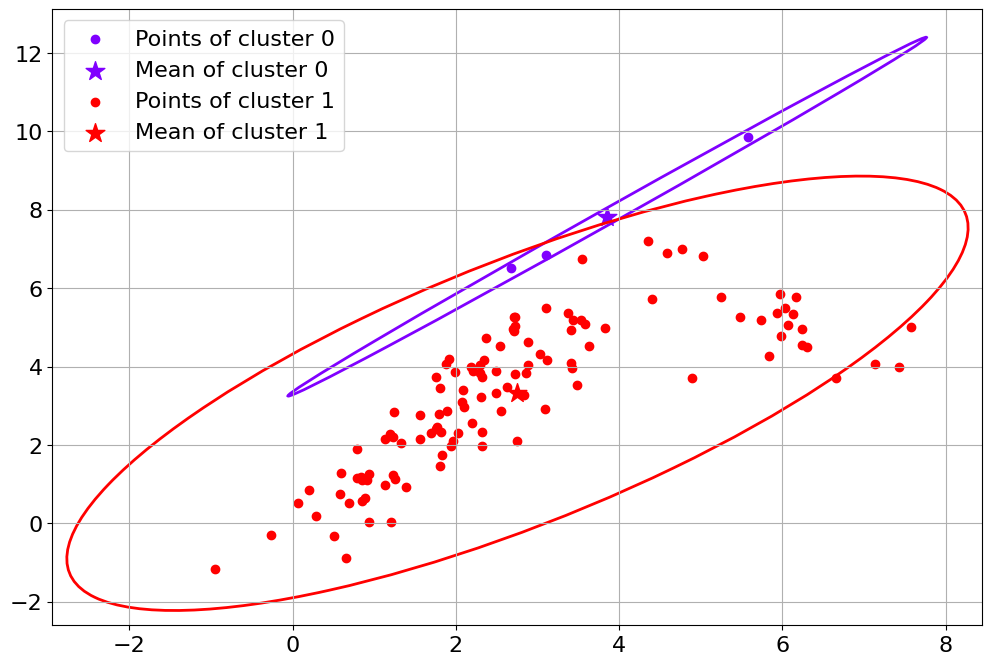

In [60]:
# run with manual init:
run_and_plot_em(data, means_init=np.array([[16,16], [10,10]]))


# $\star\star\star$ Part 2: Custom k-means and EM

Build your own implementations of k-means and EM to learn in
detail how these important algorithms work.

Compare your implementation with the sklearn
implementation.


### Part 2.1: Custom K-means implementation


In [61]:
class SimpleKMeans:
    def __init__(self, k, mean_init, num_iters=100):
        """Custom k-means implementation.

        Args:
            k: Number of clusters.
            mean_init: Initial cluster means as np array of shape (num_clusters, dimensions).
            num_iters: Number of iterations.
        """
        self.centroids = mean_init.astype(float)
        self.labels = None
        self.num_iters = num_iters
        self.k = k

    def fit(self, data):
        # run k-means on the data and store results in self.centroids and self.labels:
        # START TODO #################
        for _ in range(self.num_iters):
            
            #reshape data to match mean vector -> (N, 1, D)
            data_expanded = data[:, np.newaxis, :]

            #(N, 1, D) - (1, K, D) -> (N, K)
            #Calculate distance of each data point to every centroid, distances will be of shape (N, K)
            distances = np.linalg.norm(data_expanded - self.centroids, axis = 2)

            #assign each data point to the closest centroid
            #return index of least value and stores in labels(N, )
            self.labels = np.argmin(distances, axis = 1)

            #Update step : Recalculate centroids
            new_centroids = np.zeros_like(self.centroids)
            for j in range(self.k):
                points_in_cluster_j = data[self.labels == j]

                if len(points_in_cluster_j) > 0:
                    new_centroids[j] = np.mean(points_in_cluster_j, axis = 0)

                else:
                    new_centroids[j] = self.centroids[j]
            
            #update centroids
            self.centroids = new_centroids

        # END TODO #################


Centroids:
[[4.47527286 5.20701391]
 [1.57166965 2.14473835]]
Centroids:
[[4.47527286 5.20701391]
 [1.57166965 2.14473835]]


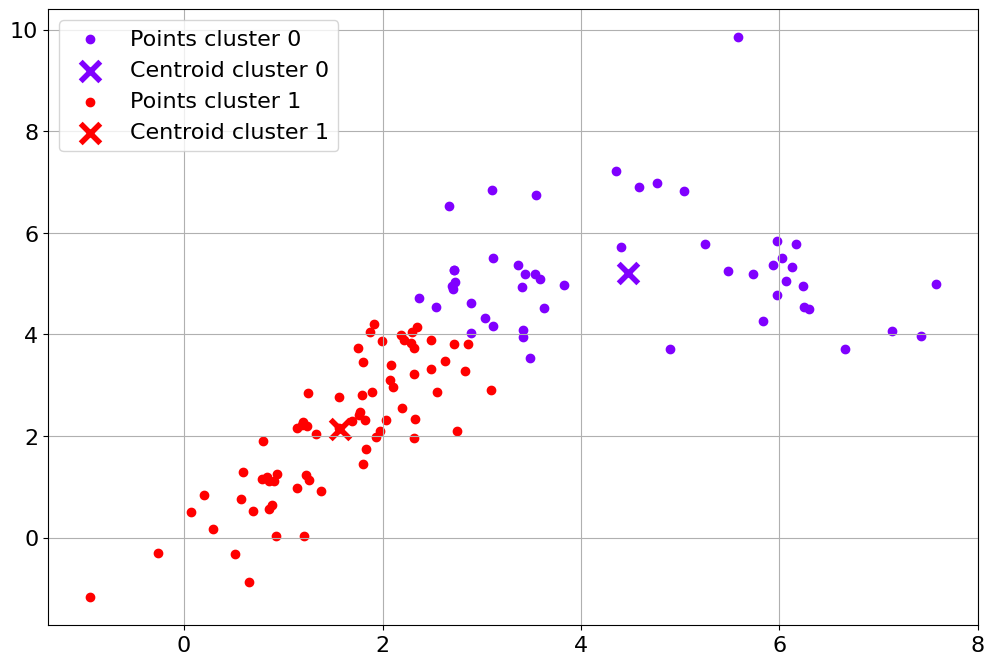

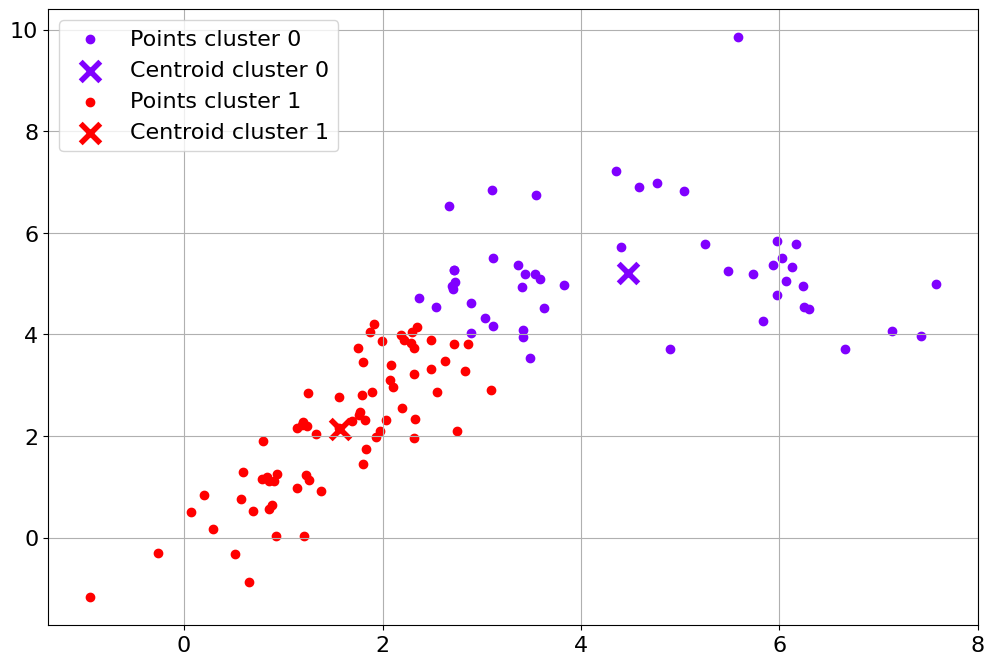

In [62]:
def run_and_plot_simple_k_means(data, init=np.array([[4,4], [10,4]]), k=2, num_iters=10):
    """Runs the custom K-means implementation on the input data and plots the results.

    Args:
        data: Input data.
        init: Initial cluster centroids.
        k : Number of clusters.
        num_iters : Number of iterations.
    """
    # Apply the custom K-Means clustering implementation.
    # Store the cluster assignments in a variable called 'labels' and the cluster centroids in a
    # variable called 'centroids':
    # START TODO #################
    kmeans = SimpleKMeans(k=k, mean_init=init, num_iters=num_iters)
    kmeans.fit(data)
    labels = kmeans.labels
    centroids = kmeans.centroids
    # END TODO #################
    
    # Print centroids:
    # START TODO #################
    print("Centroids:\n{}".format(centroids))   
    # END TODO #################
    
    # Plot results (plot datapoints and centroids; color points according to the cluster assignment):
    # START TODO #################
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.grid()
    
    cmap = plt.get_cmap('rainbow')
    colors = [cmap(i) for i in np.linspace(0, 1, k)]
    for i, color in enumerate(colors):
        cluster = data[labels==i]
        ax.scatter(cluster[:, 0], cluster[:, 1], color=color, label="Points cluster {}".format(i))
        ax.scatter(centroids[i, 0], centroids[i, 1], color=color, marker="x", s=200, lw=4, label="Centroid cluster {}".format(i))

    ax.legend()
    # END TODO #################

# Run our implementation of simple k-means:
run_and_plot_simple_k_means(data, init=np.array([[6,6], [4,5] ]), k=2, num_iters=10)


# Compare to the sklearn implementation of k-means:
run_and_plot_k_means(data, init=np.array([[6,6], [4,5]]))


### Part 2.2: Custom EM algorithm implementation


In [63]:
class SimpleEM:
    def __init__(self, means_init=None, k=2, num_iters=10):
        if means_init is None:
            self.means = np.random.rand(k, 2)
        else:
            self.means = np.array(means_init)

        self.k = k
        self.num_iters = num_iters
        self.dim = self.means.shape[1]

        self.weights = np.ones(self.k) / self.k
        self.covariance = np.array([np.identity(self.dim) for _ in range(self.k)])
        self.labels = None

    def gaussian_pdf(self, data, mean, covar):
        return stats.multivariate_normal.pdf(data, mean=mean, cov=covar, allow_singular=True)

    def fit(self, data):
        N, D = data.shape
        responsibilities = np.zeros((N, self.k))

        for iteration in range(self.num_iters):
            # E-step
            for i in range(N):
                for j in range(self.k):
                    responsibilities[i, j] = self.weights[j] * self.gaussian_pdf(data[i], self.means[j], self.covariance[j])
                total = np.sum(responsibilities[i])
                if total == 0 or np.isnan(total):
                    responsibilities[i] = 1.0 / self.k
                else:
                    responsibilities[i] /= total

            # M-step
            N_j = np.sum(responsibilities, axis=0)
            self.weights = N_j / N

            new_means = np.zeros_like(self.means)
            new_covariances = np.zeros_like(self.covariance)

            for j in range(self.k):
                if N_j[j] > 1e-6:
                    weighted_sum = np.sum(responsibilities[:, j, None] * data, axis=0)
                    new_means[j] = weighted_sum / N_j[j]

                    diffs = data - new_means[j]
                    weighted_cov = np.dot((responsibilities[:, j, None] * diffs).T, diffs) / N_j[j]
                    new_covariances[j] = weighted_cov + np.eye(D) * 1e-6  # Regularization
                else:
                    new_means[j] = self.means[j]
                    new_covariances[j] = self.covariance[j]

            self.means = new_means
            self.covariance = new_covariances

            print(f"Iteration {iteration + 1}: N_j = {N_j}")

        self.labels = np.argmax(responsibilities, axis=1)


Iteration 1: N_j = [96.10257485 23.89742515]
Iteration 2: N_j = [89.76385063 30.23614937]
Iteration 3: N_j = [78.84949675 41.15050325]
Iteration 4: N_j = [68.35592334 51.64407666]
Iteration 5: N_j = [59.42395921 60.57604079]
Iteration 6: N_j = [52.20359449 67.79640551]
Iteration 7: N_j = [46.51286649 73.48713351]
Iteration 8: N_j = [41.97211901 78.02788099]
Iteration 9: N_j = [38.19806468 81.80193532]
Iteration 10: N_j = [34.89634118 85.10365882]
Iteration 11: N_j = [31.82589383 88.17410617]
Iteration 12: N_j = [28.92420879 91.07579121]
Iteration 13: N_j = [26.440179 93.559821]
Iteration 14: N_j = [24.65691628 95.34308372]
Iteration 15: N_j = [23.57358449 96.42641551]
Iteration 16: N_j = [22.88132053 97.11867947]
Iteration 17: N_j = [22.28290607 97.71709393]
Iteration 18: N_j = [21.68251872 98.31748128]
Iteration 19: N_j = [21.14097379 98.85902621]
Iteration 20: N_j = [20.70526924 99.29473076]
Iteration 21: N_j = [20.37295437 99.62704563]
Iteration 22: N_j = [20.12403648 99.87596352]
I

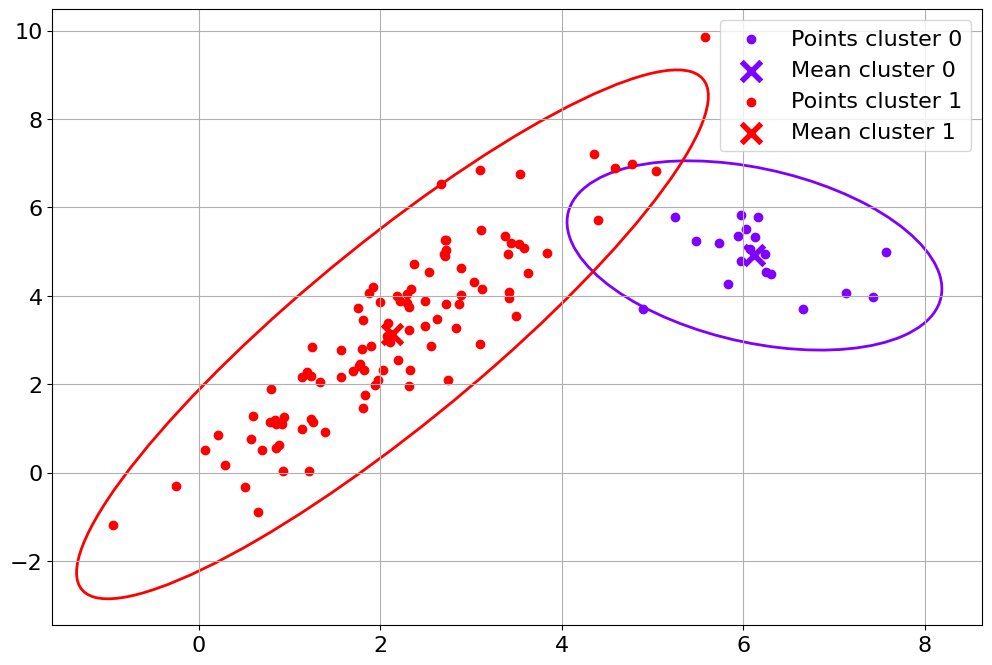

Means of GMM : 
[[2.11855468 3.11168998]
 [6.08750679 4.96159276]]
Weights of GMM : 
[0.83296608 0.16703392]


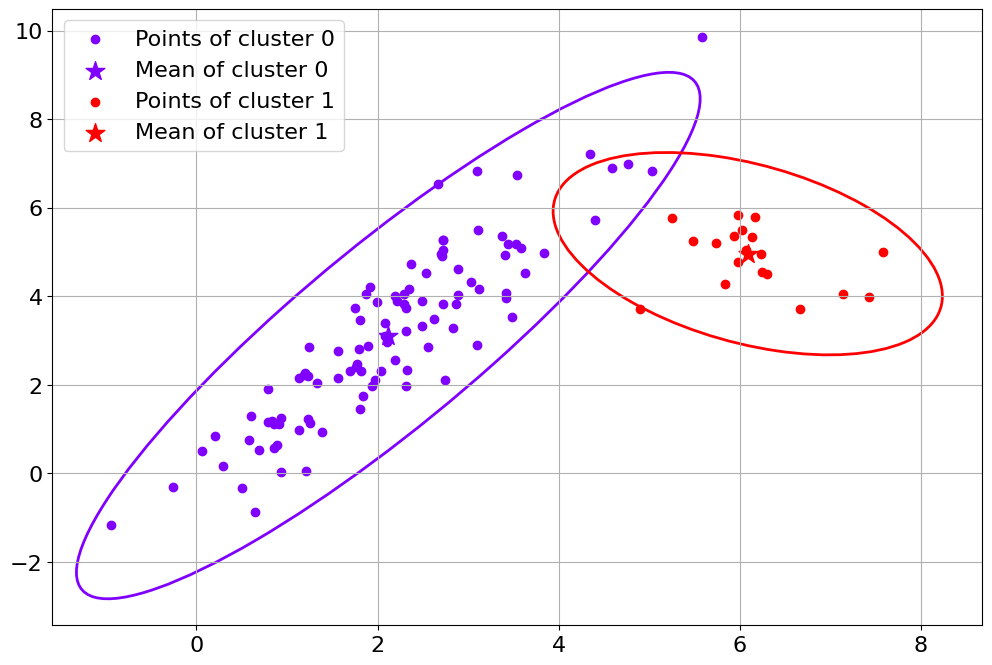

In [64]:
def run_and_plot_simple_em(data, means_init=None, k=2, num_iters=10):
    em = SimpleEM(means_init=means_init, k=k, num_iters=num_iters)
    em.fit(data)
    labels = em.labels
    weights = em.weights
    means = np.array(em.means)
    covariances = em.covariance

    print("\nCustom SimpleEM Results")
    print("Estimated Means:\n", means)
    print("Estimated Mixture Weights:\n", weights)

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.grid()

    cmap = plt.get_cmap('rainbow')
    colors = [cmap(i) for i in np.linspace(0, 1, k)]
    for i, color in enumerate(colors):
        cluster = data[labels == i]
        ax.scatter(cluster[:, 0], cluster[:, 1], color=color, label=f"Points cluster {i}")
        plot_gaussian(ax, means[i], covariances[i], color=color, size=3)
        ax.scatter(means[i, 0], means[i, 1], color=color, marker="x", s=200, lw=4, label=f"Mean cluster {i}")

    ax.legend()
    plt.show()

# Run our implementation of the EM algorithm:
run_and_plot_simple_em(data, k=2, num_iters=50)


# Compare to the sklearn implementation of the EM algorithm:
run_and_plot_em(data)